In [1]:
import gc
import pandas as pd
import numpy as np

from speech_emotion.datasets import *
from speech_emotion.plots import *
from speech_emotion.features import *
from speech_emotion.modeling import *
from speech_emotion.evaluation import *

from keras.callbacks import EarlyStopping

from keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from IPython.display import clear_output as jupyter_clear_output

## EDA

In [2]:
def eda(data_df):
    plt.title('Count of Emotions', size=16)
    sns.countplot(x=data_df.Emotions)
    plt.ylabel('Count', size=12)
    plt.xlabel('Emotions', size=12)
    sns.despine(top=True, right=True, left=False, bottom=False)
    plt.show()

In [3]:
def plots(data_df):
    emotion = 'happy'
    path = np.array(data_df.Path[data_df.Emotions == emotion])[0]
    display_waveplot(path, emotion)
    display_spectrogram(path, emotion)
    display_melspectrogram(path, emotion)

## Train Model

In [4]:
def modeling(x_train, y_train, dataset, v=False):
    model = create_model(x_train[0].shape, y_train.shape[1], v)
    plot_model(
        model,
        to_file='./data/plots/speech_emotion_model_4.png',
        show_shapes=True,
        dpi=300,
    )

    es = EarlyStopping(
        monitor='loss', patience=2
    )

    history = model.fit(
        x_train, y_train,
        batch_size=16,
        epochs=10,
        verbose=1,
        callbacks=[es],
    )
    
    del x_train, y_train
    gc.collect()

    model.save(f'{dataset}_model_4.h5')

    return model, history

## Main

Epoch 1/10
240/240 [==============================] - 43s 161ms/step - loss: 0.5052 - accuracy: 0.8122
Epoch 2/10
240/240 [==============================] - 39s 161ms/step - loss: 0.0367 - accuracy: 0.9888
Epoch 3/10
240/240 [==============================] - 39s 161ms/step - loss: 0.0269 - accuracy: 0.9914
Epoch 4/10
240/240 [==============================] - 39s 161ms/step - loss: 0.0277 - accuracy: 0.9922
Epoch 5/10
240/240 [==============================] - 39s 161ms/step - loss: 0.0058 - accuracy: 0.9982
Epoch 6/10
240/240 [==============================] - 39s 162ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 7/10
240/240 [==============================] - 39s 162ms/step - loss: 3.5437e-04 - accuracy: 1.0000
Epoch 8/10
240/240 [==============================] - 39s 162ms/step - loss: 2.3590e-04 - accuracy: 1.0000
Epoch 9/10
240/240 [==============================] - 39s 162ms/step - loss: 1.7329e-04 - accuracy: 1.0000
Epoch 10/10
240/240 [==============================] - 39s 16

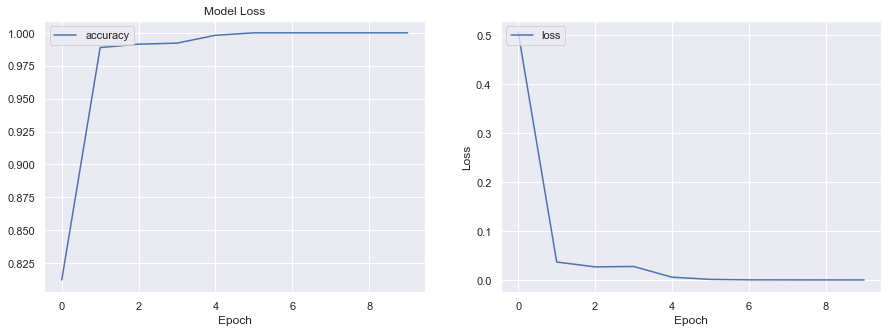

Train X shape: (3840, 128, 300, 1)
Test X shape: (960, 128, 300, 1)
Train Y shape: (3840, 4)
Test Y shape: (960, 4)
Test Accuracy: 0.9979166388511658 
Test Loss: 0.003095821011811495 
Train Accuracy: 1.0 
Train Loss: 0.00011351938883308321 
Full Dataset Accuracy: 0.9995833039283752 
Full Dataset Loss: 0.0007099797367118299
0.9979166388511658 0.003095821011811495 1.0 0.00011351938883308321 0.9995833039283752 0.0007099797367118299


In [5]:
if __name__ == "__main__":
    global DATASET, CLASSES, RESET

    RESET = False
    CLASSES = ["happy", "sad", "angry", "neutral"]

    for i in ["TESS"]:
        DATASET = i
        print(f"DATASET: {DATASET}\n")

        # Loading data
        data_df, x, y = load_x_y(RESET, CLASSES, DATASET)
        print(data_df.head())
        print("---------------------\n\n")

        print("Features:", x.shape)
        print("Labels:", y.shape)
        print("---------------------\n\n")

        # EDA
        eda(data_df)
        plots(data_df)

        del data_df
        gc.collect()

        jupyter_clear_output(wait=True)

        # Splitting data
        x_train, x_test, y_train, y_test = split(x, y)

        # del x, y, x_test, y_test
        del x_test, y_test
        gc.collect()

        jupyter_clear_output(wait=True)

        # Modeling
        model, history = modeling(x_train, y_train, DATASET)

        display_model_history(history.history, val=False)

        a1, l1, a2, l2, a3, l3 = evaluate_dataset(model, x, y)
        print(
            'Test Accuracy:           ', a1,
            '\nTest Loss:             ', l1,
            '\nTrain Accuracy:        ', a2,
            '\nTrain Loss:            ', l2,
            '\nFull Dataset Accuracy: ', a3,
            '\nFull Dataset Loss:     ', l3
        )

        # jupyter_clear_output(wait=True)